
# **ONLINE SHOPPERS PURCHASING INTENTION PREDICTION USING CLASSIFICATION**
----------                 
#### **Name:**  NISHANA M
#### **Organization:**  Entri Elevate
#### **Date:**  02-02-2025
--------


### **Data Description**

- Source: UCI Machine Learning Reposi
* Dataset Name: Online Shoppers Purchasing Intention Dataset
- Target Variable: Revenue
* Number of Instances: 12330
- Number of Features: 17

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

## **Project Goal:**

The main goal of this project is to design a machine learning classification system, that is able to predict an online shopper's intention ( buy or no buy ), based on the values of the given features.

## **Data Collection**
### Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_regression,RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

 **Data Loading**

In [4]:
#Loading the dataset
data=pd.read_csv('online_shoppers_data.csv')

In [5]:
df=pd.DataFrame(data)

In [6]:
# Display the first few rows of the dataset

print("Dataset Preview:")
df.head()

Dataset Preview:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [8]:
df.shape

(12330, 18)

In [9]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
# Summary statistics

print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## **Data Preprocessing** - Data cleaning

In [13]:
# Check for missing values

print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### ***its great thing , our dataset doesn't contains any missing values.***


In [15]:
#check for duplicate values

print("Duplicate values are:")
df.duplicated().sum()

Duplicate values are:


125

In [16]:
df=df.drop_duplicates()

In [17]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


***<span style="font-size:20px;">OUTLIER DETECTION</span>***

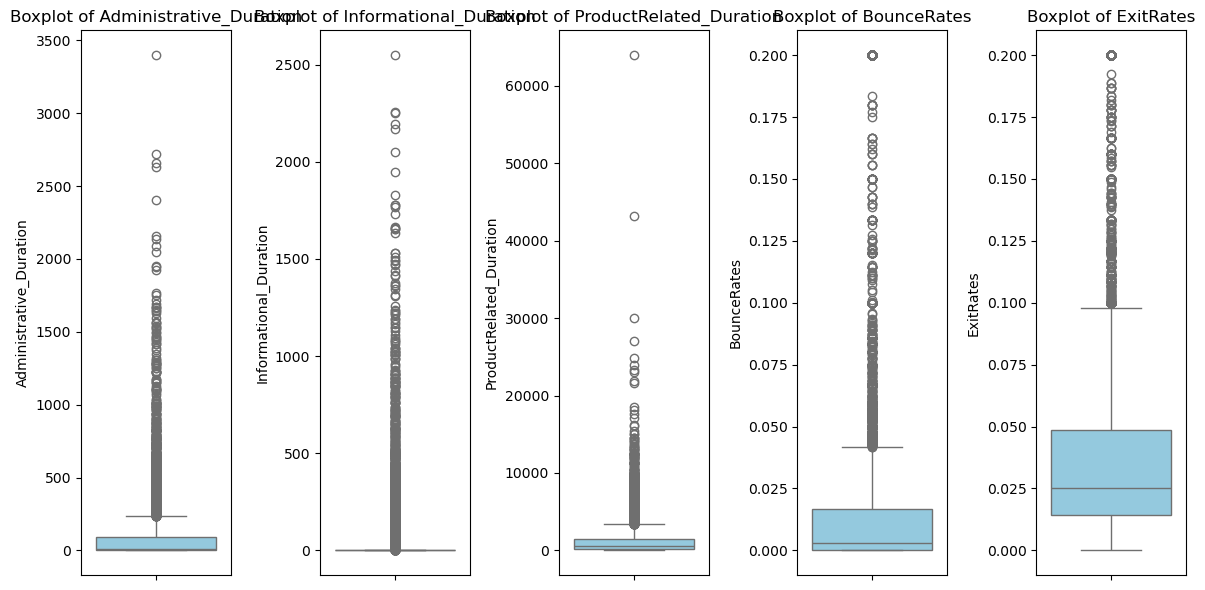

In [19]:
# List of columns to check
columns_to_check = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration','BounceRates','ExitRates']

# Create boxplots for each column
plt.figure(figsize=(12, 6))  # Adjust the figure size

for i, col in enumerate(columns_to_check, 1):  # Enumerate to track subplot index
    plt.subplot(1, 5, i) 
    # Create subplots (1 row, 3 columns)
    sns.boxplot(y=df[col], color='skyblue')  # Boxplot for the current column
    plt.title(f'Boxplot of {col}')  # Title for the subplot
    plt.ylabel(col)  # Label the y-axis
    plt.xlabel('')  # No label for the x-axis

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### ***OUTLIER HANDLING***

In [21]:
#Lets handle the outliers

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Cap the outliers by clipping values outside the bounds
    df[col] = df[col].clip(lower_bound, upper_bound)

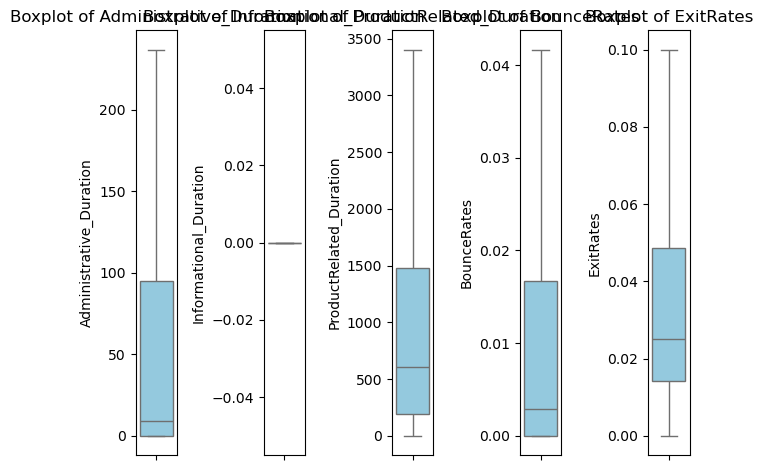

In [22]:
for i, col in enumerate(columns_to_check, 1):  # Enumerate to track subplot index
    plt.subplot(1, 5, i)  # Create subplots (1 row, 3 columns)
    sns.boxplot(y=df[col], color='skyblue')  # Boxplot for the current column
    plt.title(f'Boxplot of {col}')  # Title for the subplot
    plt.ylabel(col)  # Label the y-axis
    plt.xlabel('')  # No label for the x-axis

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [23]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.041667,0.099977,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.099977,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.041667,0.099977,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.041667,0.099977,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


***Here we got our cleaned data by removing outliers***

### ***SKEWNWESS CHECKING***

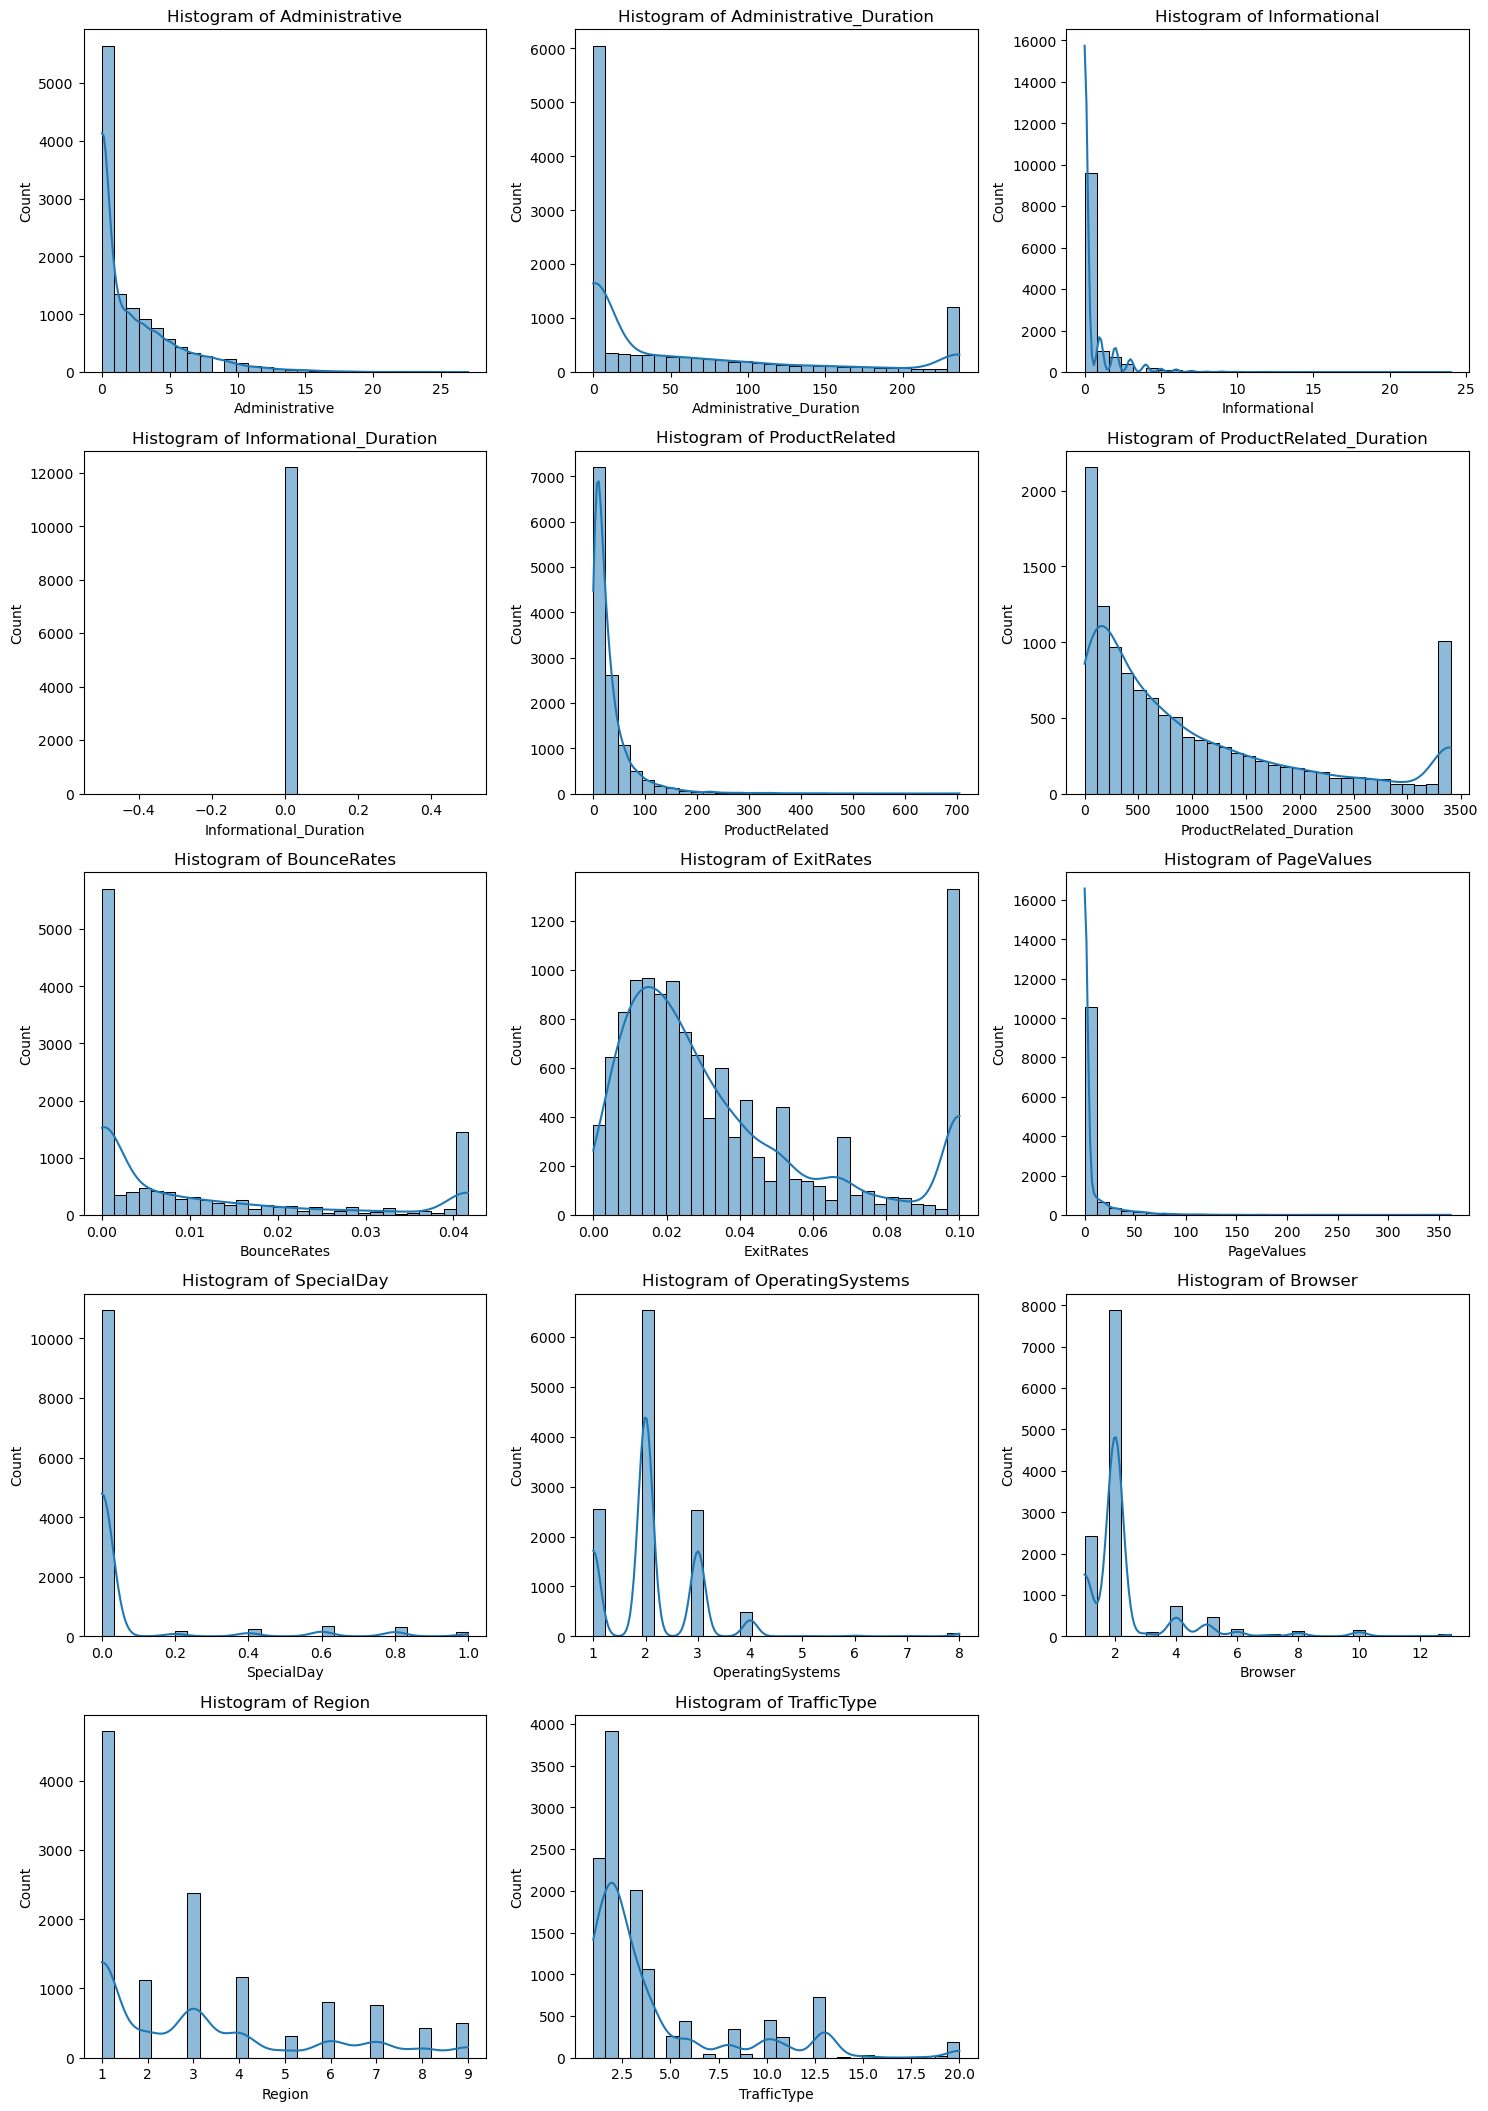

In [26]:
# Let check fro skewness
numerical_data = df.select_dtypes(include=['number'])
plt.figure(figsize=(15,25))
for i, col in enumerate(numerical_data):
    plt.subplot(6,3,i+1)
    plt.title(f"Histogram of {col}")
    sns.histplot(df[col], bins=30, kde=True, edgecolor='black')
plt.tight_layout()
plt.show() 

In [27]:

# Select numerical columns (make sure they are properly selected)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].skew()

Administrative             1.947123
Administrative_Duration    1.234182
Informational              4.014173
Informational_Duration     0.000000
ProductRelated             4.333419
ProductRelated_Duration    1.156859
BounceRates                1.234544
ExitRates                  1.119473
PageValues                 6.350983
SpecialDay                 3.285902
OperatingSystems           2.032613
Browser                    3.217404
Region                     0.978480
TrafficType                1.958514
dtype: float64

For Symmetrical Distribution (No Skewness) Skewness ≈ 0

-0.5 to 0.5: Fairly symmetrical distribution (considered ideal). -1 to -0.5 or 0.5 to 1: Moderately skewed but often acceptable for many analyses.

Less than -1 or greater than 1: Highly skewed, may require data transformation (e.g., log transformation, square root transformation)

### ***HANDLING SKEWNESS OF ALL NUMERICAL COLUMNS***

In [30]:

pt=PowerTransformer(method="yeo-johnson")
df[numerical_columns]=pt.fit_transform(df[numerical_columns])
df[numerical_columns].skew()

Administrative             0.233985
Administrative_Duration    0.101334
Informational              1.388631
Informational_Duration     0.000000
ProductRelated            -0.001725
ProductRelated_Duration   -0.156336
BounceRates                0.568852
ExitRates                  0.255073
PageValues                 1.362402
SpecialDay                 2.624728
OperatingSystems          -0.009848
Browser                   -0.001798
Region                     0.128463
TrafficType                0.150882
dtype: float64

***<span style="font-size:24px;">Exploratory Data Analysis</span>***

***<span style="font-size:20px;">Correlation analysis</span>***


<Axes: >

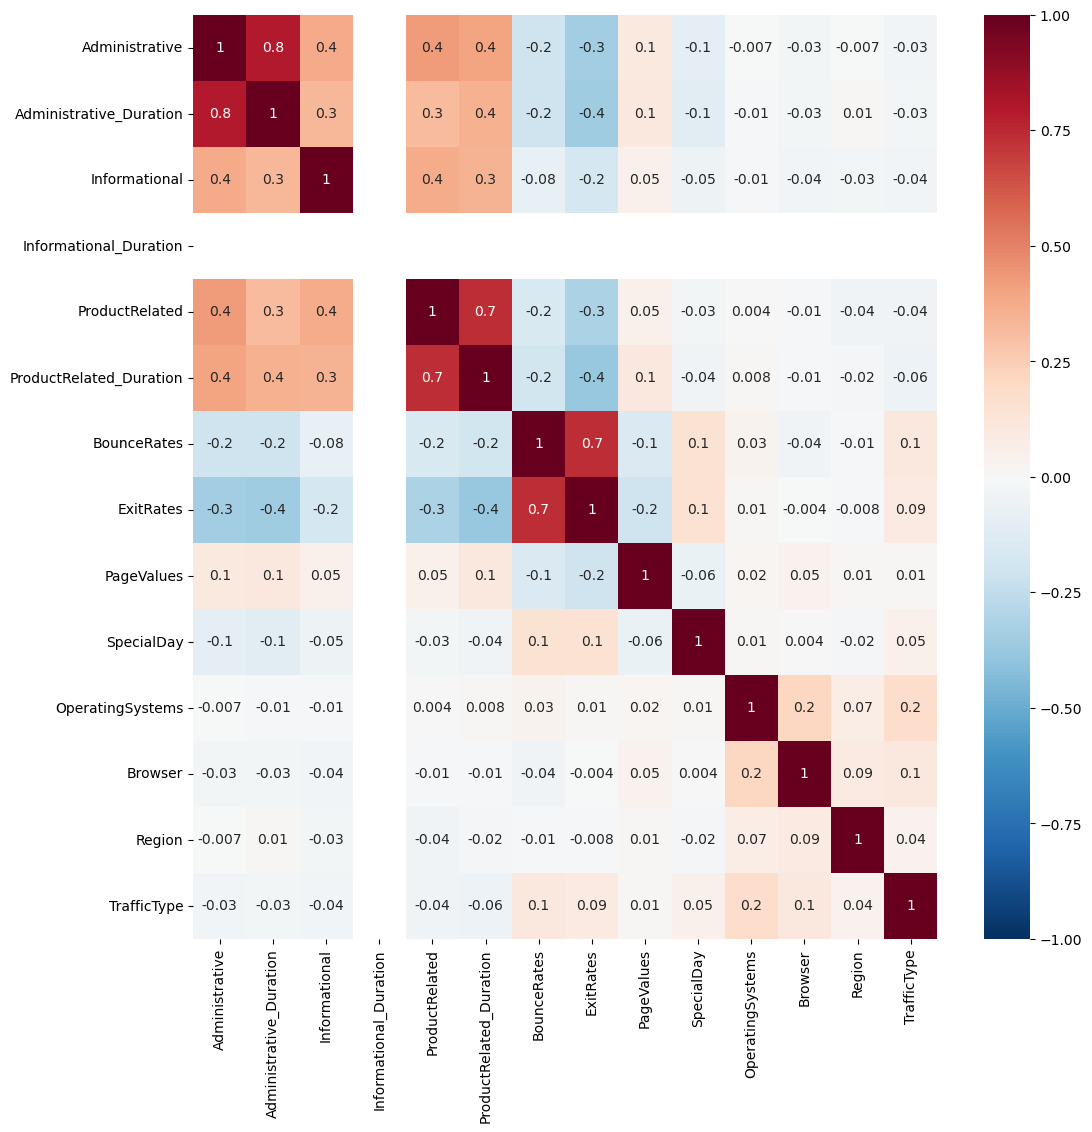

In [32]:

c=numerical_data.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(c, annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap='RdBu_r')

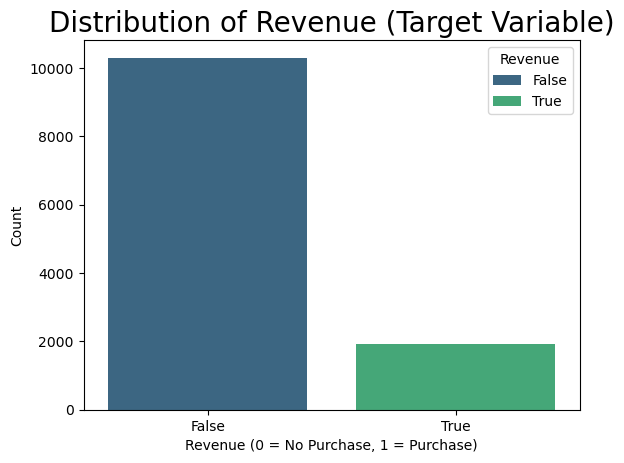

In [34]:
# checking the Distribution of customers on Revenue

sns.countplot(x='Revenue', data=df,hue='Revenue',palette='viridis')
plt.title('Distribution of Revenue (Target Variable)',fontsize=20)
plt.xlabel('Revenue (0 = No Purchase, 1 = Purchase)')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'count')

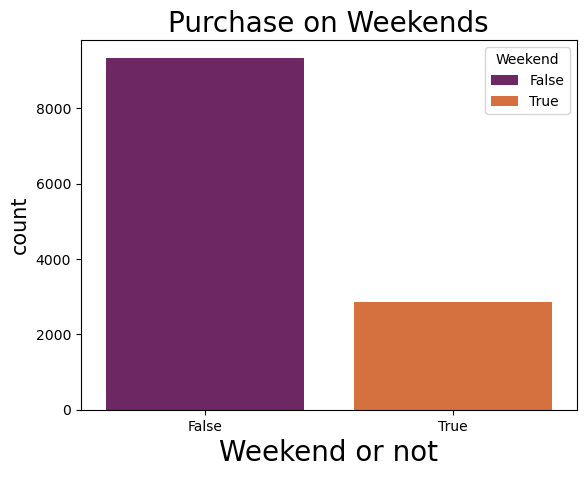

In [35]:
# checking the Distribution of customers on Weekend


sns.countplot(x='Weekend', data=df,hue='Weekend',palette='inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 20)
plt.ylabel('count', fontsize = 15)


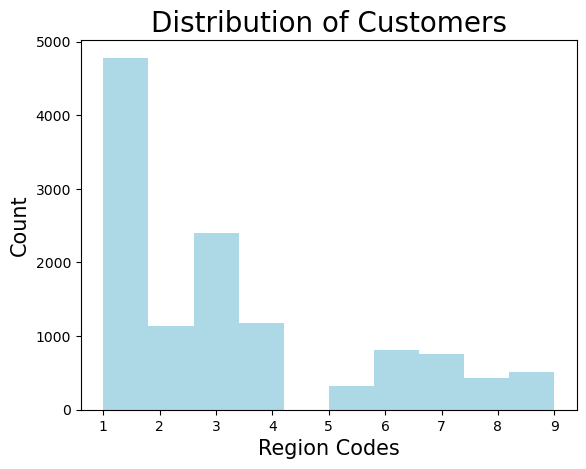

In [36]:
# visualizing the distribution of customers around the Region


plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 20)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### ***VISITOR ANALYSIS***

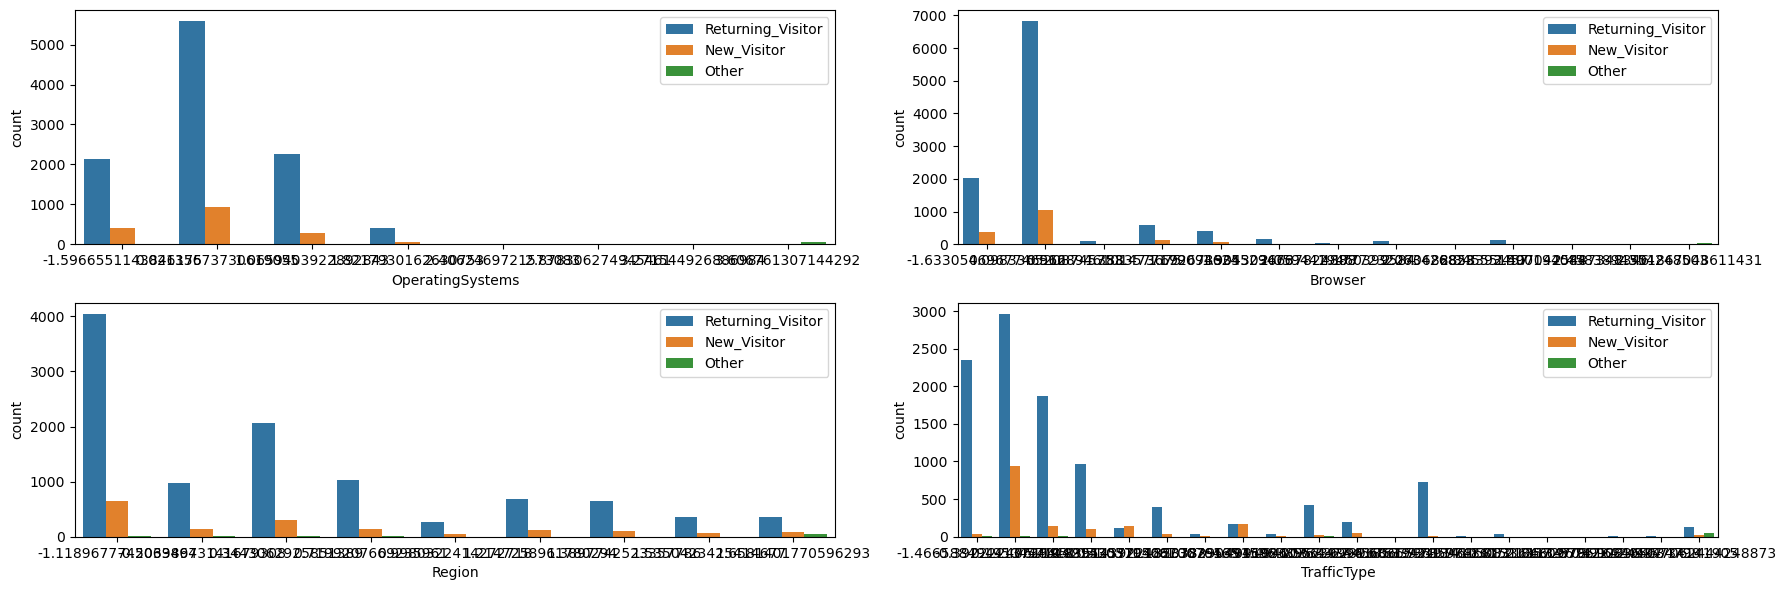

In [38]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

### ***VISIT DATE ANALYSIS***

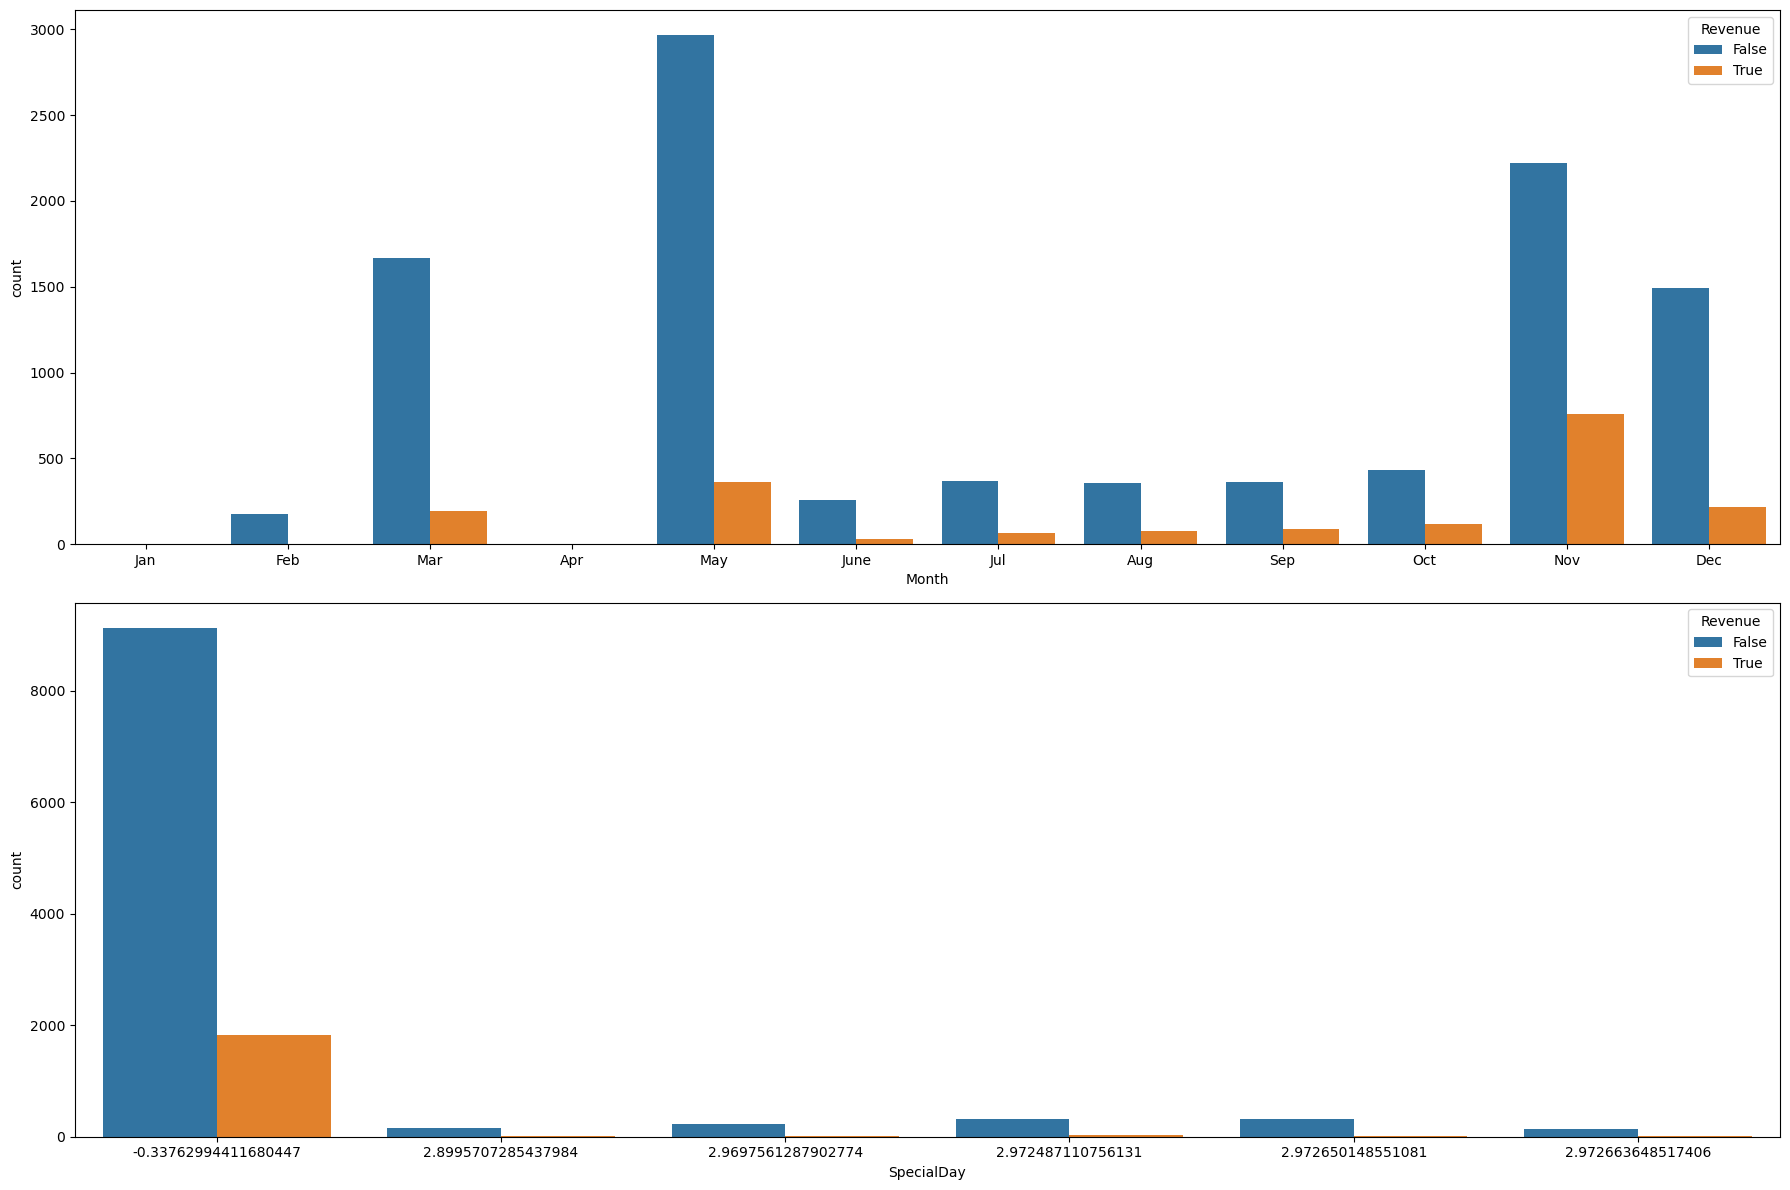

In [40]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

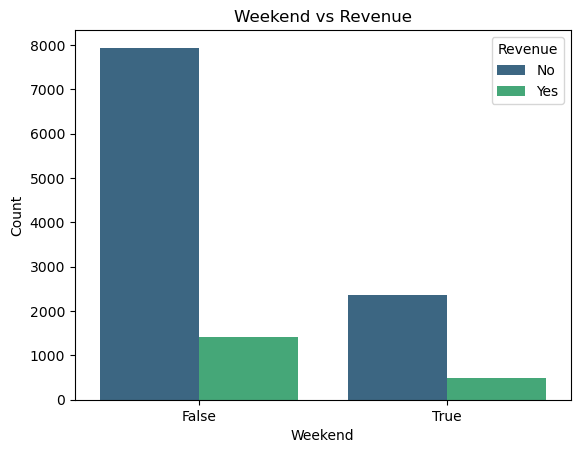

In [41]:
# Plot Weekend vs Revenue

sns.countplot(data=df, x='Weekend', hue='Revenue', palette='viridis')
plt.title("Weekend vs Revenue")
plt.xlabel("Weekend")
plt.ylabel("Count")
plt.legend(title="Revenue", labels=["No", "Yes"])
plt.show()

## ***<span style="font-size:20px;">ENCODING</span>***

In [43]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

In [44]:
df1=df.copy()

In [45]:
le=LabelEncoder()
df1['VisitorType']=le.fit_transform(df['VisitorType'])

In [46]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.998474,-1.009781,-0.523851,0.0,-1.976591,-2.068092,1.673713,1.715822,-0.532801,-0.33763,Feb,-1.596655,-1.633055,-1.118968,-1.466588,2,0,0
1,-0.998474,-1.009781,-0.523851,0.0,-1.620640,-1.180714,-0.898968,1.715822,-0.532801,-0.33763,Feb,0.021357,0.098337,-1.118968,-0.392222,2,0,0
2,-0.998474,-1.009781,-0.523851,0.0,-1.976591,-2.068092,1.673713,1.715822,-0.532801,-0.33763,Feb,1.821793,-1.633055,1.658140,0.195044,2,0,0
3,-0.998474,-1.009781,-0.523851,0.0,-1.620640,-1.898532,1.673713,1.715822,-0.532801,-0.33763,Feb,1.065940,0.098337,-0.203990,0.571142,2,0,0
4,-0.998474,-1.009781,-0.523851,0.0,-0.466390,0.028046,1.129100,0.831754,-0.532801,-0.33763,Feb,1.065940,0.916895,-1.118968,0.571142,2,1,0


In [47]:
onehot=OneHotEncoder(sparse_output=False)
month_oh=onehot.fit_transform(df1[['Month']])
month_col=onehot.get_feature_names_out(['Month'])
month_df = pd.DataFrame(month_oh, columns=month_col, index=df1.index)
df1 = pd.concat([df1.drop(columns=['Month']), month_df], axis=1)


In [48]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,-0.998474,-1.009781,-0.523851,0.0,-1.976591,-2.068092,1.673713,1.715822,-0.532801,-0.33763,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.998474,-1.009781,-0.523851,0.0,-1.620640,-1.180714,-0.898968,1.715822,-0.532801,-0.33763,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.998474,-1.009781,-0.523851,0.0,-1.976591,-2.068092,1.673713,1.715822,-0.532801,-0.33763,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.998474,-1.009781,-0.523851,0.0,-1.620640,-1.898532,1.673713,1.715822,-0.532801,-0.33763,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.998474,-1.009781,-0.523851,0.0,-0.466390,0.028046,1.129100,0.831754,-0.532801,-0.33763,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***<span style="font-size:22px;">Feature Selection</span>***

In [51]:
#Splitting the data

X = df1.drop(columns = ['Revenue'])
y = df1['Revenue']

In [52]:
select=SelectKBest(score_func=f_regression,k=20)
X_new=select.fit_transform(X,y)


In [53]:
selected_features=X.columns[select.get_support()]
feature_score=pd.DataFrame({"Features":X.columns,"Score":select.scores_}).sort_values(by ="Score",ascending=False)

In [54]:
print(selected_features)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Browser', 'VisitorType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep'],
      dtype='object')


 ***<span style="font-size:23px;">Splitting data to training and testing sets</span>***

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=42)

In [57]:
print("Shape of x_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9764, 20)
Shape of y_train : (9764,)
Shape of x_test : (2441, 20)
Shape of y_test : (2441,)


## Feature Scaling:

In [59]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

## Build the ML Model:

In [61]:
models={
    "Logistic Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boosting":GradientBoostingClassifier()
}

## Model Evaluation

In [62]:
results = {}

for model_name, model in models.items():
    #training
    model.fit(X_train_scaled,y_train)

    #predicting
    y_pred = model.predict(X_test_scaled)

    # Accuracy
    accuracy = accuracy_score(y_test,y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    cr = classification_report(y_test, y_pred)

    # Store results in Dictionary
    results[model_name] = {
         "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }
# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Logistic Regression Results:
Accuracy: 0.8992
Confusion Matrix:
[[1971  108]
 [ 138  224]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2079
           1       0.67      0.62      0.65       362

    accuracy                           0.90      2441
   macro avg       0.80      0.78      0.79      2441
weighted avg       0.90      0.90      0.90      2441


Support Vector Classifier Results:
Accuracy: 0.8992
Confusion Matrix:
[[1973  106]
 [ 140  222]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2079
           1       0.68      0.61      0.64       362

    accuracy                           0.90      2441
   macro avg       0.81      0.78      0.79      2441
weighted avg       0.90      0.90      0.90      2441


Decision Tree Classifier Results:
Accuracy: 0.8562
Confusion Matrix:
[[1887  192]
 [ 159  203]]
Classificatio

In [63]:

results_df = pd.DataFrame(results).T
results_df

,Accuracy,Confusion Matrix,Classification Report
Logistic Regression,0.899222,"[[1971, 108], [138, 224]]",precision recall f1-score ...
Support Vector Classifier,0.899222,"[[1973, 106], [140, 222]]",precision recall f1-score ...
Decision Tree Classifier,0.856206,"[[1887, 192], [159, 203]]",precision recall f1-score ...
Random Forest,0.90127,"[[1987, 92], [149, 213]]",precision recall f1-score ...
Gradient Boosting,0.905367,"[[1979, 100], [131, 231]]",precision recall f1-score ...


***<span style="font-size:20px;">The best model is Gradient Boosting with a score of 0.904547.</span>***


***<span style="font-size:24px;">Hyper Parameter Tuning</span>***

In [ ]:
# hyperparameter tuning using RandomizedSearchCV for GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_classifier = GradientBoostingClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)

In [71]:
print(" Accuracy (Randomized Search):", random_search.best_score_)

 Accuracy (Randomized Search): 0.9017821993066573


## Pipeline Creation:

In [126]:
# Define the pipeline with scaling and RandomForest model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('classifier', GradientBoostingClassifier(**random_search.best_params_, random_state=42))  # Best Model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on test data
y_pred = pipeline.predict(X_test)
from sklearn.metrics import accuracy_score
print("Pipeline Test Accuracy:", accuracy_score(y_test, y_pred))

Pipeline Test Accuracy: 0.9074149938549775


## Saving the model:

In [128]:
# Save the trained pipeline
joblib.dump(pipeline, 'online_customers_pipeline.joblib')

print("Model saved as 'online_customers_pipeline.joblib'")

Model saved as 'online_customers_pipeline.joblib'


## Test with Unseen Data:

In [240]:
loaded_model = joblib.load('online_customers_pipeline.joblib')
unseen_data= pd.read_csv('unseendata.csv')  # Load new data


In [242]:
unseen_df = pd.DataFrame(unseen_data)

In [244]:
unseen_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False
1,1,0.0,0,0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True
2,0,0.0,0,0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False
3,0,0.0,0,0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False
4,0,0.0,0,0,9,303.666667,0.005556,0.046296,0.0,0.0,Feb,2,4,5,2,Returning_Visitor,False


In [246]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           18 non-null     int64  
 1   Administrative_Duration  18 non-null     float64
 2   Informational            18 non-null     int64  
 3   Informational_Duration   18 non-null     int64  
 4   ProductRelated           18 non-null     int64  
 5   ProductRelated_Duration  18 non-null     float64
 6   BounceRates              18 non-null     float64
 7   ExitRates                18 non-null     float64
 8   PageValues               18 non-null     float64
 9   SpecialDay               18 non-null     float64
 10  Month                    18 non-null     object 
 11  OperatingSystems         18 non-null     int64  
 12  Browser                  18 non-null     int64  
 13  Region                   18 non-null     int64  
 14  TrafficType              18 

In [248]:
#ENCODING THE UNSEEN DATA

unseen_df.Weekend = unseen_df.Weekend.astype('int')

le=LabelEncoder()
unseen_df['VisitorType']=le.fit_transform(unseen_df['VisitorType'])

onehot=OneHotEncoder(sparse_output=False)
unseen_month_oh=onehot.fit_transform(unseen_df[['Month']])
unseen_month_col=onehot.get_feature_names_out(['Month'])
unseen_month_df = pd.DataFrame(unseen_month_oh, columns=unseen_month_col, index=unseen_df.index)
unseen_df= pd.concat([unseen_df.drop(columns=['Month']),unseen_month_df], axis=1)



In [250]:
unseen_df.shape

(18, 20)

In [252]:
unseen_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Month_Aug,Month_Feb,Month_Mar,Month_May
0,0,0.0,0,0,1,0.000000,0.200000,0.200000,0.0,0.4,2,4,3,3,0,0,0.0,1.0,0.0,0.0
1,1,0.0,0,0,0,0.000000,0.200000,0.200000,0.0,0.0,1,2,1,5,0,1,0.0,1.0,0.0,0.0
2,0,0.0,0,0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,3,0,0,0.0,1.0,0.0,0.0
3,0,0.0,0,0,3,738.000000,0.000000,0.022222,0.0,0.4,2,4,1,2,0,0,0.0,1.0,0.0,0.0
4,0,0.0,0,0,9,303.666667,0.005556,0.046296,0.0,0.0,2,4,5,2,0,0,0.0,1.0,0.0,0.0


In [256]:
X_test_unseen_scaled=scaler.fit_transform(unseen_df)

In [262]:
predictions = loaded_model.predict(X_test_unseen_scaled)
print(f"Predictions: {predictions}")

Predictions: [1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1]


In [264]:
unseen_df['Revenue'] = predictions

In [266]:
unseen_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType,Weekend,Month_Aug,Month_Feb,Month_Mar,Month_May,Revenue
0,0,0.000000,0,0,1,0.000000,0.200000,0.200000,0.000000,0.4,...,4,3,3,0,0,0.0,1.0,0.0,0.0,1
1,1,0.000000,0,0,0,0.000000,0.200000,0.200000,0.000000,0.0,...,2,1,5,0,1,0.0,1.0,0.0,0.0,1
2,0,0.000000,0,0,2,37.000000,0.000000,0.100000,0.000000,0.8,...,2,2,3,0,0,0.0,1.0,0.0,0.0,0
3,0,0.000000,0,0,3,738.000000,0.000000,0.022222,0.000000,0.4,...,4,1,2,0,0,0.0,1.0,0.0,0.0,0
4,0,0.000000,0,0,9,303.666667,0.005556,0.046296,0.000000,0.0,...,4,5,2,0,0,0.0,1.0,0.0,0.0,0
5,0,0.000000,0,0,3,25.000000,0.000000,0.066667,0.000000,0.0,...,4,1,5,0,0,0.0,1.0,0.0,0.0,1
6,0,0.000000,0,0,2,42.000000,0.050000,0.150000,0.000000,0.4,...,2,1,4,0,0,0.0,1.0,0.0,0.0,1
7,4,103.625000,0,0,14,1003.416667,0.000000,0.018039,0.000000,0.2,...,1,3,3,0,0,0.0,1.0,0.0,0.0,0
8,0,0.000000,0,0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,2,7,3,0,0,0.0,1.0,0.0,0.0,1
9,0,0.000000,0,0,7,141.166667,0.000000,0.007143,0.000000,0.0,...,2,3,1,0,0,0.0,0.0,1.0,0.0,0


## **Conclusion**

This project successfully predicts online shoppers' purchasing intentions using machine learning. By analyzing user behavior from session data, the model identifies key factors influencing purchase decisions. The results show that attributes like session duration, number of pages visited, and visitor type play a significant role in predicting purchases. The classification models used have shown good accuracy, proving their usefulness in e-commerce analytics.

## **Future Scope:**

Improving Accuracy: Fine-tuning models, exploring deep learning, and using advanced techniques can enhance predictions.

Adding More Data: Including more user behavior and demographic data can improve the model's reliability.

Real-Time Use: Deploying the model in real-time can help businesses make quick decisions.

Applying to Other Fields: The model can be adapted to other industries for similar analysis.

Better Recommendations: Integrating with recommendation systems can help businesses suggest products effectively.

## **Impact:**

Better Customer Experience: Understanding user intent can help personalize shopping experiences.

More Sales: Targeting high-intent users can improve conversion rates and revenue.

Smarter Marketing: Businesses can focus their marketing efforts on the right audience.

Fraud Prevention: Detecting unusual behavior can help prevent fraudulent transactions.

Data-Driven Decisions: Businesses can use predictive analytics to optimize strategies and improve customer retention.